<a href="https://colab.research.google.com/github/Nushrat-Jahan/Computer-Vision/blob/main/Final/Cifar_data_K_fold_cross_validation(Final%20Assignment%201).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

In [2]:
# Model configuration
batch_size = 50
img_width, img_height, img_num_channels = 32, 32, 3
loss_function = sparse_categorical_crossentropy
no_classes = 100
no_epochs = 15
optimizer = Adam()
verbosity = 1
num_folds = 20

In [3]:
# Load CIFAR-10 data
(input_train, target_train), (input_test, target_test) = cifar10.load_data()

In [4]:
# Determine shape of the data
input_shape = (img_width, img_height, img_num_channels)

In [5]:
# Parse numbers as floats
input_train = input_train.astype('float32')
input_test = input_test.astype('float32')

In [6]:
# Normalize data
input_train = input_train / 255
input_test = input_test / 255

In [7]:
# Define per-fold score containers
acc_per_fold = []
loss_per_fold = []

In [8]:
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((target_train, target_test), axis=0)

In [9]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)

In [10]:
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):

  # Define the model architecture
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(no_classes, activation='softmax'))

  # Compile the model
  model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/15
1140/1140 [==============================] - 13s 10ms/step - loss: 1.4801 - accuracy: 0.4674
Epoch 2/15
1140/1140 [==============================] - 11s 10ms/step - loss: 1.0763 - accuracy: 0.6179
Epoch 3/15
1140/1140 [==============================] - 11s 10ms/step - loss: 0.9150 - accuracy: 0.6785
Epoch 4/15
1140/1140 [==============================] - 11s 10ms/step - loss: 0.8045 - accuracy: 0.7173
Epoch 5/15
1140/1140 [==============================] - 11s 10ms/step - loss: 0.7073 - accuracy: 0.7521
Epoch 6/15
1140/1140 [==============================] - 11s 10ms/step - loss: 0.6158 - accuracy: 0.7826
Epoch 7/15
1140/1140 [==============================] - 11s 10ms/step - loss: 0.5320 - accuracy: 0.8137
Epoch 8/15
1140/1140 [==============================] - 11s 10ms/step - loss: 0.4560 - accuracy: 0.8389
Epoch 9/15
1140/1140 [==============================] - 11s 10ms/step -

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.7254308462142944 - Accuracy: 69.76666450500488%


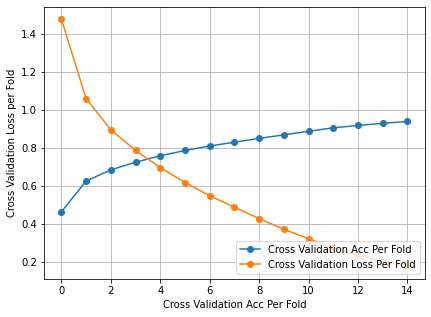

------------------------------------------------------------------------
> Fold 2 - Loss: 1.175933837890625 - Accuracy: 69.49999928474426%


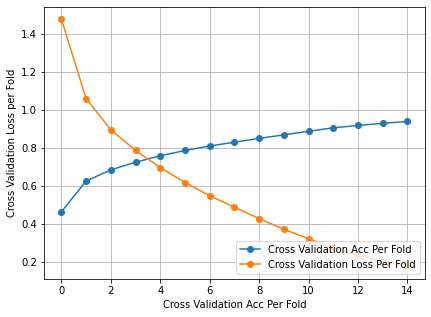

------------------------------------------------------------------------
> Fold 3 - Loss: 1.2660454511642456 - Accuracy: 67.43333339691162%


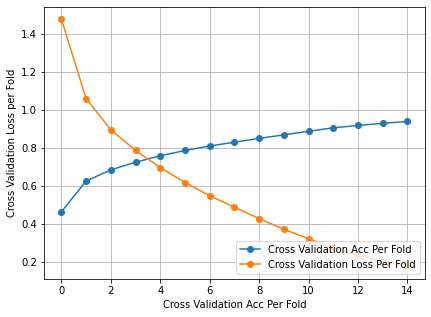

------------------------------------------------------------------------
> Fold 4 - Loss: 1.2666776180267334 - Accuracy: 69.30000185966492%


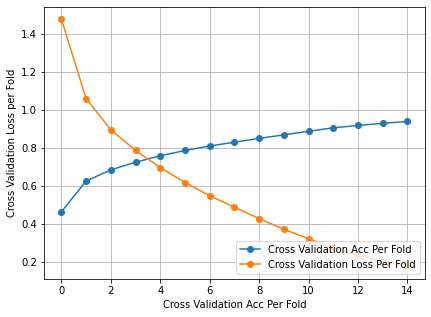

------------------------------------------------------------------------
> Fold 5 - Loss: 1.4575209617614746 - Accuracy: 67.59999990463257%


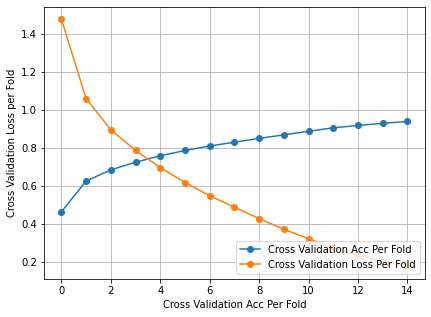

------------------------------------------------------------------------
> Fold 6 - Loss: 1.0263854265213013 - Accuracy: 69.9999988079071%


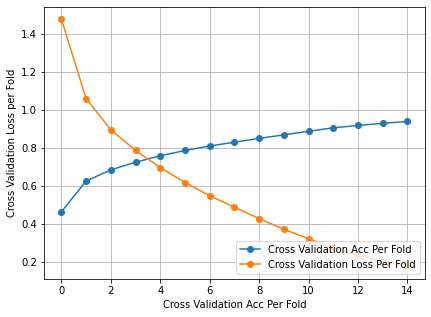

------------------------------------------------------------------------
> Fold 7 - Loss: 1.3676326274871826 - Accuracy: 69.66666579246521%


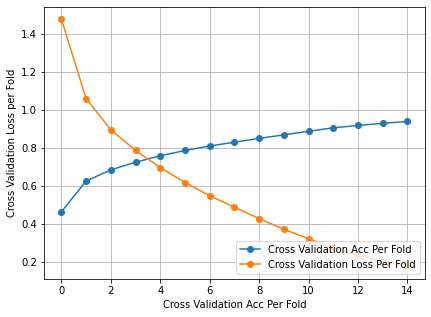

------------------------------------------------------------------------
> Fold 8 - Loss: 1.1589608192443848 - Accuracy: 67.63333082199097%


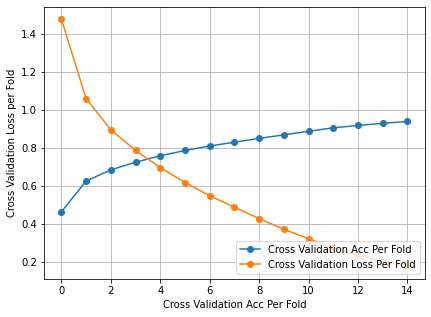

------------------------------------------------------------------------
> Fold 9 - Loss: 1.0857558250427246 - Accuracy: 68.19999814033508%


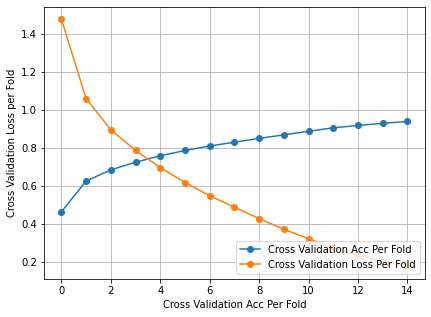

------------------------------------------------------------------------
> Fold 10 - Loss: 1.3124665021896362 - Accuracy: 69.93333101272583%


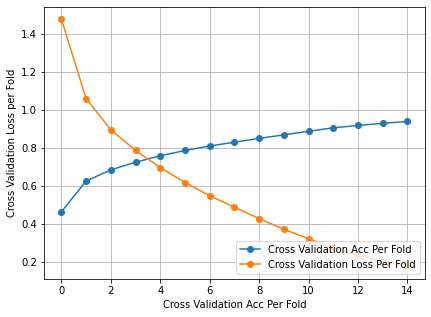

------------------------------------------------------------------------
> Fold 11 - Loss: 1.1152253150939941 - Accuracy: 69.0666675567627%


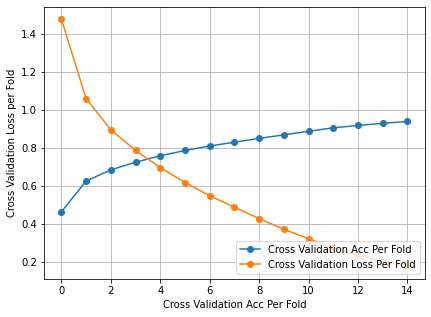

------------------------------------------------------------------------
> Fold 12 - Loss: 1.3855607509613037 - Accuracy: 68.93333196640015%


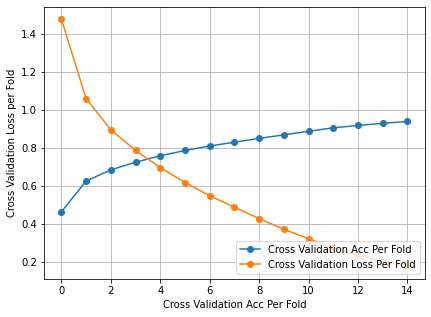

------------------------------------------------------------------------
> Fold 13 - Loss: 1.298172116279602 - Accuracy: 70.99999785423279%


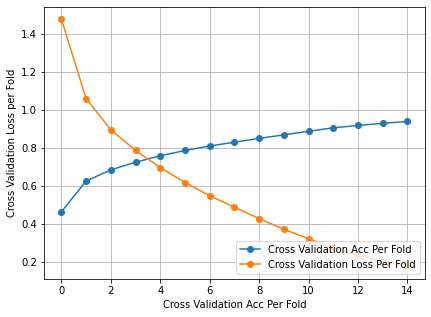

------------------------------------------------------------------------
> Fold 14 - Loss: 1.100492238998413 - Accuracy: 67.93333292007446%


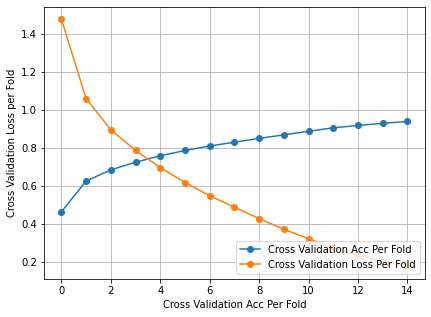

------------------------------------------------------------------------
> Fold 15 - Loss: 1.2040549516677856 - Accuracy: 68.4000015258789%


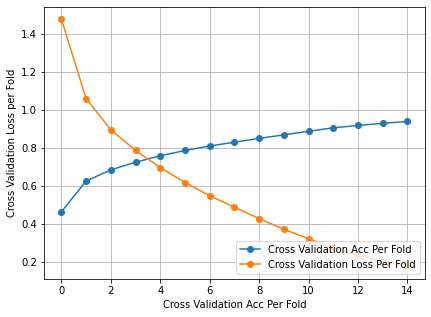

------------------------------------------------------------------------
> Fold 16 - Loss: 1.2425318956375122 - Accuracy: 68.03333163261414%


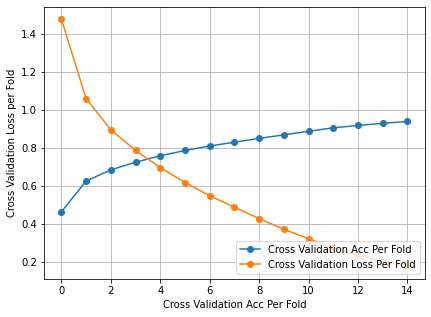

------------------------------------------------------------------------
> Fold 17 - Loss: 1.1730283498764038 - Accuracy: 70.09999752044678%


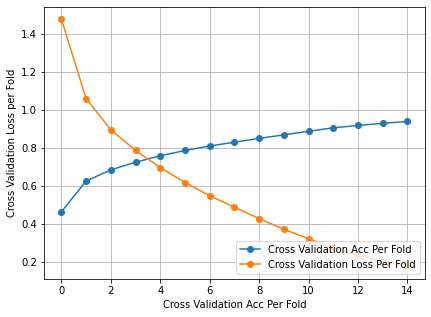

------------------------------------------------------------------------
> Fold 18 - Loss: 1.088493824005127 - Accuracy: 67.76666641235352%


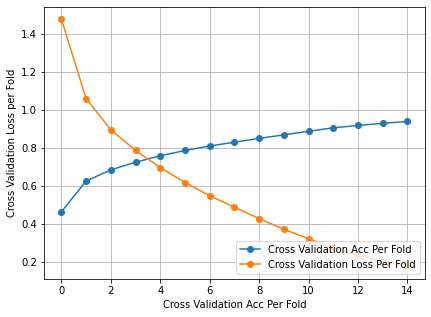

------------------------------------------------------------------------
> Fold 19 - Loss: 1.1540889739990234 - Accuracy: 69.9666678905487%


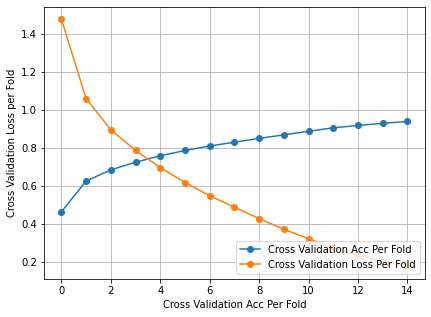

------------------------------------------------------------------------
> Fold 20 - Loss: 1.4544373750686646 - Accuracy: 69.23333406448364%


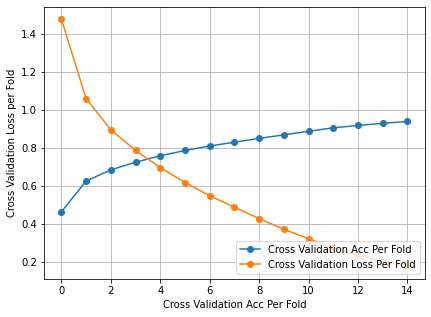

------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 68.97333264350891 (+- 1.0077806000525658)
> Loss: 1.2529447853565217
------------------------------------------------------------------------


In [12]:
import matplotlib.pyplot as plt

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'], 'o-', label='Cross Validation Acc Per Fold')
  plt.plot(history.history['loss'], 'o-', label = 'Cross Validation Loss Per Fold')
  plt.xlabel('Cross Validation Acc Per Fold')
  plt.ylabel('Cross Validation Loss per Fold')
  plt.grid(True)
  plt.legend(loc='lower right')
  plt.show()
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')